In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

## Data Cleaning and restructuring

### Data import

In [3]:
DF = pd.read_csv('EPL_2022-2023_match_data.csv')
DF.head()

,match_id,teams_home,teams_away,goals_home,goals_away,xg_home,xg_away
0,18202,Crystal Palace,Arsenal,0,2,1.21,1.44
1,18203,Fulham,Liverpool,2,2,1.27,2.34
2,18204,Bournemouth,Aston Villa,2,0,0.59,0.49
3,18205,Leeds,Wolverhampton Wanderers,2,1,0.89,1.10
4,18206,Newcastle United,Nottingham Forest,2,0,1.86,0.24


### Adding boulean columns for results, xg attempts results and whether they match

In [4]:
#Creating boulean columns to figure out who won
DF_result = DF.copy(deep=True)
DF_result['home_win'] = DF_result['goals_home'] > DF_result['goals_away']
DF_result['draw'] = DF_result['goals_home'] == DF_result['goals_away']
DF_result['away_win'] = DF_result['goals_away'] > DF_result['goals_home']
DF_result.head()

,match_id,teams_home,teams_away,goals_home,goals_away,xg_home,xg_away,home_win,draw,away_win
0,18202,Crystal Palace,Arsenal,0,2,1.21,1.44,False,False,True
1,18203,Fulham,Liverpool,2,2,1.27,2.34,False,True,False
2,18204,Bournemouth,Aston Villa,2,0,0.59,0.49,True,False,False
3,18205,Leeds,Wolverhampton Wanderers,2,1,0.89,1.10,True,False,False
4,18206,Newcastle United,Nottingham Forest,2,0,1.86,0.24,True,False,False


In [5]:
#Creating boulean columns to figure out what the expected goals result would be
DF_result ['xg_home_win'] = DF_result ['xg_home'] > DF_result ['xg_away']
DF_result ['xg_draw'] = DF_result ['xg_home'] == DF_result ['xg_away']
DF_result ['xg_away_win'] = DF_result ['xg_away'] > DF_result ['xg_home']
DF_result.head()

,match_id,teams_home,teams_away,goals_home,goals_away,xg_home,xg_away,home_win,draw,away_win,xg_home_win,xg_draw,xg_away_win
0,18202,Crystal Palace,Arsenal,0,2,1.21,1.44,False,False,True,False,False,True
1,18203,Fulham,Liverpool,2,2,1.27,2.34,False,True,False,False,False,True
2,18204,Bournemouth,Aston Villa,2,0,0.59,0.49,True,False,False,True,False,False
3,18205,Leeds,Wolverhampton Wanderers,2,1,0.89,1.10,True,False,False,False,False,True
4,18206,Newcastle United,Nottingham Forest,2,0,1.86,0.24,True,False,False,True,False,False


In [6]:
#Working out if the expected goals measure correctly shows the outcome of the game, and which way it was wrong
def compare_results(row):
    return (row['home_win'] == row['xg_home_win']) and (row['draw'] == row['xg_draw']) and (row['away_win'] == row['xg_away_win'])
DF_result['xg_matches_real'] = DF_result.apply(compare_results, axis=1)
DF_result.head()

,match_id,teams_home,teams_away,goals_home,goals_away,xg_home,xg_away,home_win,draw,away_win,xg_home_win,xg_draw,xg_away_win,xg_matches_real
0,18202,Crystal Palace,Arsenal,0,2,1.21,1.44,False,False,True,False,False,True,True
1,18203,Fulham,Liverpool,2,2,1.27,2.34,False,True,False,False,False,True,False
2,18204,Bournemouth,Aston Villa,2,0,0.59,0.49,True,False,False,True,False,False,True
3,18205,Leeds,Wolverhampton Wanderers,2,1,0.89,1.10,True,False,False,False,False,True,False
4,18206,Newcastle United,Nottingham Forest,2,0,1.86,0.24,True,False,False,True,False,False,True


## Analysis

In [7]:
#the number of times results made by xg do not match real results
discrepancy_count = DF_result[DF_result['xg_matches_real'] == False].shape[0]
print ("Numbers of games where the real result is different to the result predicted by xg: ",discrepancy_count)

Numbers of games where the real result is different to the result predicted by xg:  147


In [8]:
#the number of times results made by xg do not match real results - not including draws
## it is highly unlikely that two teams will have the exact same XG therefore the draw probability is highly unlikely. How does this change the result?
def compare_results_no_draw(row):
    if row['draw']:  
        return True
    return (row['home_win'] == row['xg_home_win']) and (row['away_win'] == row['xg_away_win'])

DF_result['xg_matches_real_no_draw'] = DF_result.apply(compare_results_no_draw, axis=1)

discrepancy_no_draw_count = DF_result[DF_result['xg_matches_real_no_draw'] == False].shape[0]
print ("Numbers of games where the real result is different to the result predicted by xg (no draws):", discrepancy_no_draw_count)

Numbers of games where the real result is different to the result predicted by xg (no draws): 61


In [9]:
#Total goals scored by home teams, away teams and total
total_goals_home = DF_result['goals_home'].sum()
total_goals_away = DF_result['goals_away'].sum()

total_goals = total_goals_home + total_goals_away

print ("Total goals scored:", total_goals)
print ("Total goals scored by home teams:",total_goals_home)
print ("Total goals scored by away teams:", total_goals_away)

Total goals scored: 1084
Total goals scored by home teams: 621
Total goals scored by away teams: 463


In [10]:
xg_total_home = DF_result['xg_home'].sum()
xg_total_away = DF_result['xg_away'].sum()

xg_total = xg_total_home + xg_total_away

print ("Total xg:", xg_total)
print ("Home xg:", xg_total_home)
print ("Away xg:", xg_total_away)

Total xg: 1126.54
Home xg: 634.29
Away xg: 492.24999999999994


In [13]:
xg_real_difference_home = total_goals_home - xg_total_home
xg_real_difference_away = total_goals_away - xg_total_away
xg_real_difference_overall = total_goals - xg_total

print ("XG vs Real Difference Total:", xg_real_difference_overall)# this many less goals were scored than chances created
print ("XG vs Real Difference Home:", xg_real_difference_home) 
print ("XG vs Real Difference Away:", xg_real_difference_away)

XG vs Real Difference Total: -42.539999999999964
XG vs Real Difference Home: -13.289999999999964
XG vs Real Difference Away: -29.249999999999943


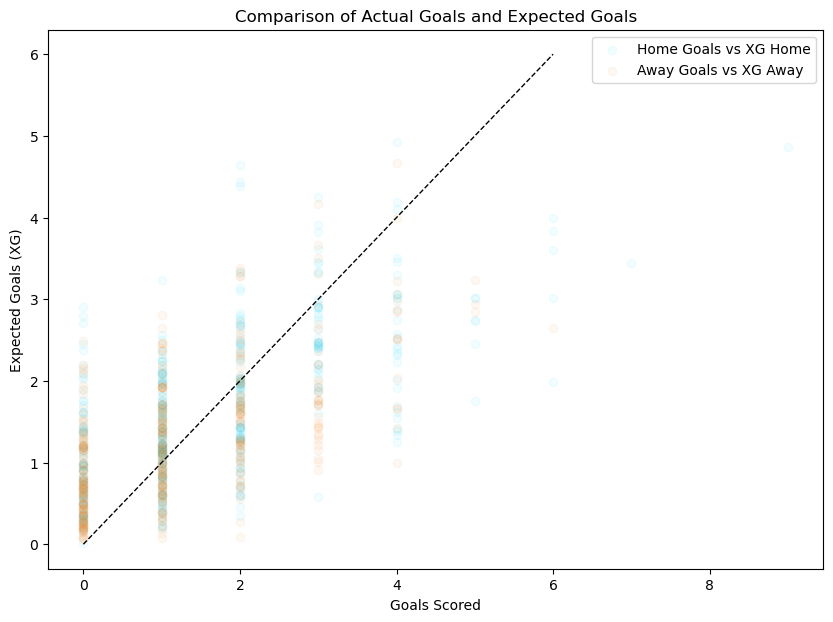

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(DF_result['goals_home'], DF_result['xg_home'], color='#00DCFF', label='Home Goals vs XG Home', alpha = 0.05)
plt.scatter(DF_result['goals_away'], DF_result['xg_away'], color='#FD7600', label='Away Goals vs XG Away',alpha = 0.05)
plt.plot([0, 6], [0, 6], color='black', linestyle='--', linewidth=1)

plt.xlabel('Goals Scored')
plt.ylabel('Expected Goals (XG)')
plt.title('Comparison of Actual Goals and Expected Goals')
plt.legend()
plt.show()
#above the trend line shows when teams have under-performed xg, below the trend line shows when teams have over-performed xg

In [19]:
DF.describe()

,match_id,goals_home,goals_away,xg_home,xg_away
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,18391.500000,1.634211,1.218421,1.669184,1.295395
std,109.840794,1.419944,1.183518,0.940286,0.801811
min,18202.000000,0.000000,0.000000,0.020000,0.060000
25%,18296.750000,1.000000,0.000000,0.967500,0.690000
50%,18391.500000,1.000000,1.000000,1.540000,1.190000
75%,18486.250000,2.000000,2.000000,2.242500,1.720000
max,18581.000000,9.000000,6.000000,4.920000,4.670000


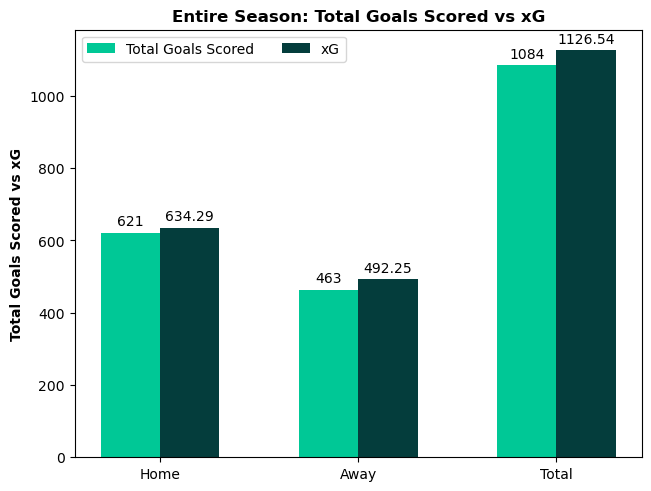

In [57]:
location = ("Home", "Away", "Total")
goal_type = {
    'Total Goals Scored': (total_goals_home, total_goals_away, total_goals),
    'xG': (xg_total_home, xg_total_away, xg_total)
}
x = np.arange(len(location))
width = 0.3  

fig, ax = plt.subplots(layout='constrained')

offset = width / 2 * (len(goal_type) - 1)
colors = {
    'Total Goals Scored': '#00C896',  
    'xG': '#043D3C'             
}

for i, (attribute, measurement) in enumerate(goal_type.items()):
    rects = ax.bar(x - offset + i*width, measurement, width, label=attribute, color=colors[attribute])
    ax.bar_label(rects, padding=3)

ax.set_ylabel('Total Goals Scored vs xG', fontweight="bold")
ax.set_title('Entire Season: Total Goals Scored vs xG', fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(location)
ax.legend(loc='upper left', ncols=3)